In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

## Importing hotel_bookings.csv

In [192]:
#importing hotel_bookings.csv and viewing first 5 rows
hotel_bookings = pd.read_csv("../../Hotel Data/hotel_bookings.csv")
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Having a look at the data

In [193]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
hotel_bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Cleaning the data

### Replacing nulls

In [194]:
hotel_bookings.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [195]:
# Replacing NAs with "Unknown" or zeroes depending on the type
hotel_bookings[["country", "agent", "company"]] = hotel_bookings[["country", "agent", "company"]].fillna("Unknown")
hotel_bookings['children'] = hotel_bookings['children'].fillna(0)
hotel_bookings.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

### Drop columns

In [196]:
print(hotel_bookings.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [197]:
#Dropping columns not relevant to my analysis
hotel_bookings = hotel_bookings.drop(['meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests'], axis=1)
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,deposit_type,adr,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,PRT,0,0,0,No Deposit,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,PRT,0,0,0,No Deposit,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,GBR,0,0,0,No Deposit,75.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,GBR,0,0,0,No Deposit,75.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,GBR,0,0,0,No Deposit,98.0,Check-Out,2015-07-03


## Create new columns

### Create "arrival_date" column

In [198]:
hotel_bookings["arrival_date"] = hotel_bookings["arrival_date_day_of_month"].astype(str) + "-" + hotel_bookings["arrival_date_month"].astype(str) + "-" + hotel_bookings["arrival_date_year"].astype(str)
hotel_bookings["arrival_date"] = pd.to_datetime(hotel_bookings["arrival_date"])
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,deposit_type,adr,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,PRT,0,0,0,No Deposit,0.0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,PRT,0,0,0,No Deposit,0.0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,GBR,0,0,0,No Deposit,75.0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,GBR,0,0,0,No Deposit,75.0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,GBR,0,0,0,No Deposit,98.0,Check-Out,2015-07-03,2015-07-01


### Create "total_guests" column (adults + children + babies)

In [199]:
hotel_bookings["total_guests"] = hotel_bookings["adults"] + hotel_bookings["children"] + hotel_bookings["babies"]
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,deposit_type,adr,reservation_status,reservation_status_date,arrival_date,total_guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,PRT,0,0,0,No Deposit,0.0,Check-Out,2015-07-01,2015-07-01,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,PRT,0,0,0,No Deposit,0.0,Check-Out,2015-07-01,2015-07-01,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,GBR,0,0,0,No Deposit,75.0,Check-Out,2015-07-02,2015-07-01,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,GBR,0,0,0,No Deposit,75.0,Check-Out,2015-07-02,2015-07-01,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,GBR,0,0,0,No Deposit,98.0,Check-Out,2015-07-03,2015-07-01,2.0


In [17]:
#numpy
print(np.min(hotel_bookings['total_guests']))
print(np.max(hotel_bookings['total_guests']))
print(np.mean(hotel_bookings['total_guests']))
print(np.median(hotel_bookings['total_guests']))

0.0
55.0
1.9682385459418712
2.0


In [53]:
np.max(hotel_bookings['total_guests'])

55.0

In [54]:
np.mean(hotel_bookings['total_guests'])

1.9682385459418712

In [55]:
np.median(hotel_bookings['total_guests'])

2.0

In [19]:
hotel_bookings["total_guests"].describe()

count    119390.000000
mean          1.968239
std           0.722394
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: total_guests, dtype: float64

In [25]:
hotel_bookings["arrival_date"].sort_values()

0        2015-07-01
75559    2015-07-01
75560    2015-07-01
75561    2015-07-01
75562    2015-07-01
            ...    
40039    2017-08-31
40040    2017-08-31
13794    2017-08-31
40038    2017-08-31
117424   2017-08-31
Name: arrival_date, Length: 119390, dtype: datetime64[ns]

In [27]:
print(np.min(hotel_bookings["arrival_date"]))
print(np.max(hotel_bookings["arrival_date"]))

2015-07-01 00:00:00
2017-08-31 00:00:00


### Dropping rows with total_guests = 0

In [71]:
### TO DO - COUNT NUMBER OF TOTAL GUESTS = 0

In [70]:
#### Also round total guests to 0

In [28]:
hotel_bookings[hotel_bookings["total_guests"]==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,deposit_type,adr,reservation_status,reservation_status_date,arrival_date,total_guests
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,PRT,0,0,0,No Deposit,0.00,Check-Out,2015-10-06,2015-10-06,0.0
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,PRT,0,0,0,No Deposit,0.00,Check-Out,2015-10-12,2015-10-12,0.0
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,ESP,0,0,0,No Deposit,0.00,Check-Out,2015-11-23,2015-11-20,0.0
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,PRT,0,0,0,No Deposit,0.00,Check-Out,2016-01-04,2015-12-30,0.0
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,PRT,0,0,0,No Deposit,0.00,Check-Out,2016-01-05,2015-12-30,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,CHE,0,0,0,No Deposit,100.80,Check-Out,2017-06-30,2017-06-27,0.0
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,PRT,0,0,0,No Deposit,0.00,Check-Out,2017-07-01,2017-06-30,0.0
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,SWE,0,0,0,No Deposit,73.80,Check-Out,2017-07-17,2017-07-15,0.0
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,RUS,0,0,0,No Deposit,22.86,Check-Out,2017-07-22,2017-07-15,0.0


### Create "total_nights" column

In [200]:
hotel_bookings["total_nights"] = hotel_bookings["stays_in_weekend_nights"] + hotel_bookings["stays_in_week_nights"]
hotel_bookings[["stays_in_weekend_nights", "stays_in_week_nights", "total_nights"]]

,stays_in_weekend_nights,stays_in_week_nights,total_nights
0,0,0,0
1,0,0,0
2,0,1,1
3,0,1,1
4,0,2,2
...,...,...,...
119385,2,5,7
119386,2,5,7
119387,2,5,7
119388,2,5,7


In [77]:
hotel_bookings["total_nights"].describe()

count    119390.000000
mean          3.427900
std           2.557439
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: total_nights, dtype: float64

In [69]:
#### COUNT NUMBER OF ROWS WITH 0 NIGHTS AND LOOK AT DROPPING

### Create function grouping bookings i.e. large group, family, couple, individual traveller

In [201]:
def party_type(hotel_bookings):
    total_guests = hotel_bookings['total_guests']
    adults = hotel_bookings['adults']
    if total_guests > 6:
        return("Large Group")
    elif total_guests == 1:
        return("Individual Traveller")
    elif total_guests == 0:
        return("Unknown")
    else:
        if adults != total_guests:
            return("Family")
        else:
            if total_guests == 2:
                return("Couple")
            else: 
                return("Group")

In [202]:
hotel_bookings["party_type"] = hotel_bookings.apply(party_type, axis=1)
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_cancellations,previous_bookings_not_canceled,deposit_type,adr,reservation_status,reservation_status_date,arrival_date,total_guests,total_nights,party_type
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,No Deposit,0.0,Check-Out,2015-07-01,2015-07-01,2.0,0,Couple
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,No Deposit,0.0,Check-Out,2015-07-01,2015-07-01,2.0,0,Couple
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,No Deposit,75.0,Check-Out,2015-07-02,2015-07-01,1.0,1,Individual Traveller
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,No Deposit,75.0,Check-Out,2015-07-02,2015-07-01,1.0,1,Individual Traveller
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,No Deposit,98.0,Check-Out,2015-07-03,2015-07-01,2.0,2,Couple


In [33]:
# not really needed. Just checkingfunction is working
guests_per_visit = hotel_bookings.loc[:, ['adults', 'children', 'babies', 'total_guests', 'party_type']]
guests_per_visit

,adults,children,babies,total_guests,party_type
0,2,0.0,0,2.0,Couple
1,2,0.0,0,2.0,Couple
2,1,0.0,0,1.0,Individual Traveller
3,1,0.0,0,1.0,Individual Traveller
4,2,0.0,0,2.0,Couple
...,...,...,...,...,...
119385,2,0.0,0,2.0,Couple
119386,3,0.0,0,3.0,Group
119387,2,0.0,0,2.0,Couple
119388,2,0.0,0,2.0,Couple


In [34]:
# Looking at large numbers of guests
hotel_bookings[hotel_bookings["total_guests"]>20]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,deposit_type,adr,reservation_status,reservation_status_date,arrival_date,total_guests,party_type
1539,Resort Hotel,1,304,2015,September,36,3,0,3,40,...,0,0,0,No Deposit,0.0,Canceled,2015-01-02,2015-09-03,40.0,Large Group
1587,Resort Hotel,1,333,2015,September,36,5,2,5,26,...,0,0,0,No Deposit,0.0,Canceled,2015-01-02,2015-09-05,26.0,Large Group
1643,Resort Hotel,1,336,2015,September,37,7,1,2,50,...,0,0,0,No Deposit,0.0,Canceled,2015-01-18,2015-09-07,50.0,Large Group
1752,Resort Hotel,1,340,2015,September,37,12,2,5,26,...,0,0,0,No Deposit,0.0,Canceled,2015-01-02,2015-09-12,26.0,Large Group
1884,Resort Hotel,1,347,2015,September,38,19,2,5,26,...,0,0,0,No Deposit,0.0,Canceled,2015-01-02,2015-09-19,26.0,Large Group
1917,Resort Hotel,1,349,2015,September,39,21,1,3,27,...,0,0,0,No Deposit,0.0,Canceled,2015-01-02,2015-09-21,27.0,Large Group
1962,Resort Hotel,1,352,2015,September,39,24,1,3,27,...,0,0,0,No Deposit,0.0,Canceled,2015-01-02,2015-09-24,27.0,Large Group
2003,Resort Hotel,1,354,2015,September,39,26,2,5,26,...,0,0,0,No Deposit,0.0,Canceled,2015-01-02,2015-09-26,26.0,Large Group
2164,Resort Hotel,1,361,2015,October,40,3,2,5,26,...,0,0,0,No Deposit,0.0,Canceled,2015-01-02,2015-10-03,26.0,Large Group
2173,Resort Hotel,1,338,2015,October,41,4,2,0,55,...,0,0,0,No Deposit,0.0,Canceled,2015-01-02,2015-10-04,55.0,Large Group


### Create "cancelation_period" column

In [203]:
# Create "cancelation_period" columns based off reservation status and taking the difference between that date and arrival date
# Does this make sense??
cancelations = hotel_bookings.loc[:,["reservation_status", "reservation_status_date", "arrival_date"]]
cancelations = cancelations[cancelations["reservation_status"]=="Canceled"]
cancelations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43017 entries, 8 to 111924
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   reservation_status       43017 non-null  object        
 1   reservation_status_date  43017 non-null  object        
 2   arrival_date             43017 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.3+ MB


In [204]:
cancelations["reservation_status_date"] = pd.to_datetime(hotel_bookings["reservation_status_date"])
cancelations["cancelation_period"] = cancelations["arrival_date"] - cancelations["reservation_status_date"]
cancelations.head()

,reservation_status,reservation_status_date,arrival_date,cancelation_period
8,Canceled,2015-05-06,2015-07-01,56 days
9,Canceled,2015-04-22,2015-07-01,70 days
10,Canceled,2015-06-23,2015-07-01,8 days
27,Canceled,2015-05-11,2015-07-01,51 days
32,Canceled,2015-05-29,2015-07-01,33 days


In [49]:
### Might look at classifying the cancelation period i.e. 48 hours in advance, no show, 1 week, longer etc

### Visualisations on cancelations

In [37]:
hotel_bookings['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

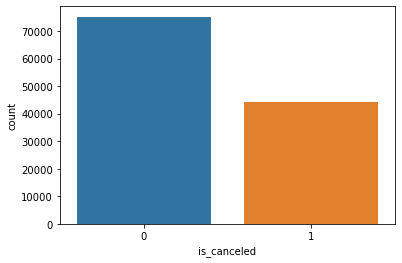

In [38]:
sns.countplot(data = hotel_bookings, x = 'is_canceled')

<AxesSubplot:xlabel='hotel', ylabel='count'>

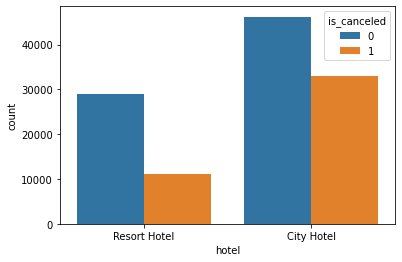

In [39]:
sns.countplot(data = hotel_bookings, x = 'hotel', hue = 'is_canceled')

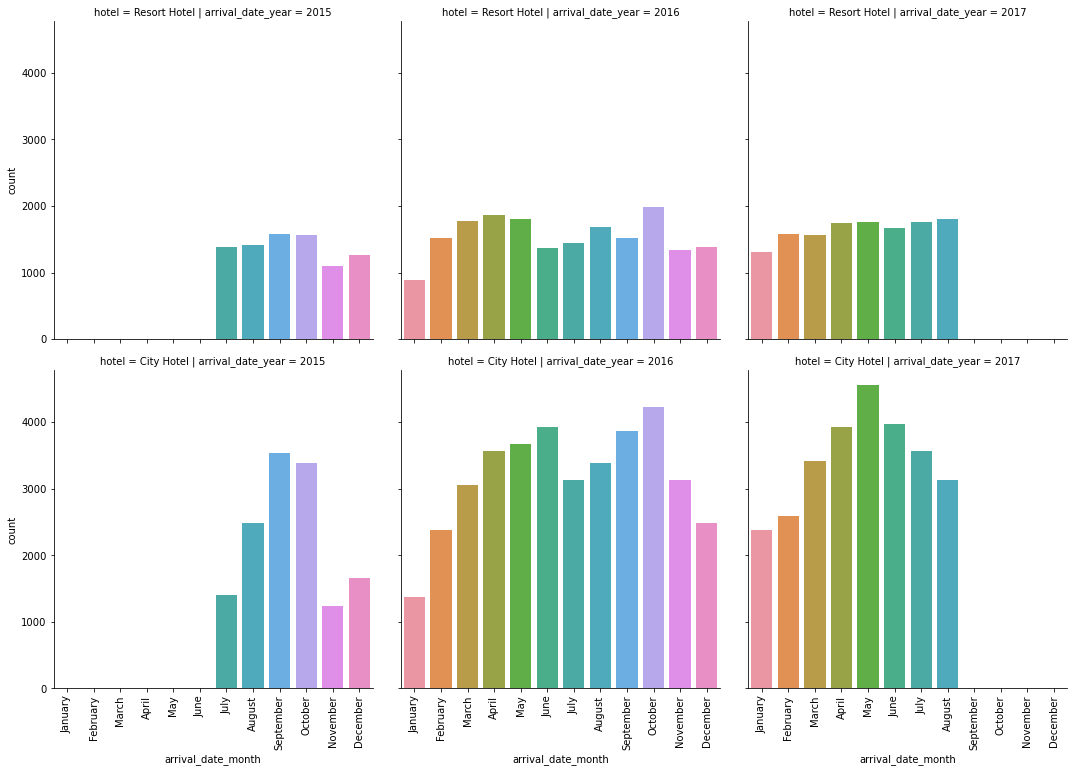

In [163]:
# Creating a list to ensure months appear in the correct order in following graph
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Using catplot() to view number of check-ins per month/year brokwn out by hotel type (resort vs city)
g=sns.catplot(data = hotel_bookings, x="arrival_date_month", kind = "count", order = month_order, row = "hotel", col = "arrival_date_year")
g.set_xticklabels(rotation=90)
plt.show()

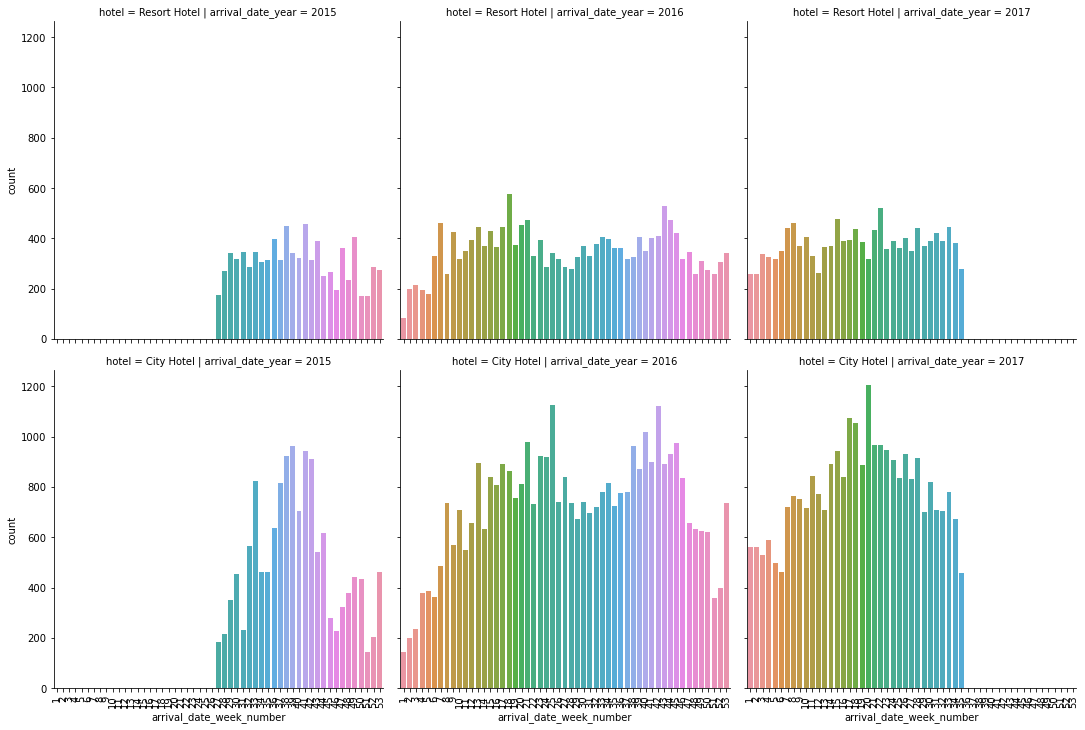

In [122]:
# The above catplot() is interesting but I want a more granular view so breaking out by week number/year
g=sns.catplot(data = hotel_bookings, x="arrival_date_week_number", kind = "count", row = "hotel", col = "arrival_date_year")
g.set_xticklabels(rotation=90)
plt.show()

## APIs

In [166]:
requests.get('https://www.gov.uk/bank-holidays.json')

<Response [200]>

In [169]:
requests.get('https://date.nager.at/api/v3/publicholidays/2015/PT')
requests.get('https://date.nager.at/api/v3/publicholidays/2016/PT')
requests.get('https://date.nager.at/api/v3/publicholidays/2017/PT')

<Response [200]>

In [171]:
holidays_portugal_2015 = requests.get('https://date.nager.at/api/v3/publicholidays/2015/PT')
holidays_portugal_2016 = requests.get('https://date.nager.at/api/v3/publicholidays/2016/PT')
holidays_portugal_2017 = requests.get('https://date.nager.at/api/v3/publicholidays/2017/PT')
holidays_portugal_2015 = pd.DataFrame(holidays_portugal_2015.json())
holidays_portugal_2016 = pd.DataFrame(holidays_portugal_2016.json())
holidays_portugal_2017 = pd.DataFrame(holidays_portugal_2017.json())

In [172]:
holidays_portugal_2015.head()

,date,localName,name,countryCode,fixed,global,counties,launchYear,types
0,2015-01-01,Ano Novo,New Year's Day,PT,True,True,None,None,[Public]
1,2015-02-17,Carnaval,Carnival,PT,False,True,None,None,[Optional]
2,2015-04-03,Sexta-feira Santa,Good Friday,PT,False,True,None,None,[Public]
3,2015-04-05,Domingo de Páscoa,Easter Sunday,PT,False,True,None,None,[Public]
4,2015-04-25,Dia da Liberdade,Freedom Day,PT,True,True,None,None,[Public]


In [173]:
holidays_portugal_2016.head()

,date,localName,name,countryCode,fixed,global,counties,launchYear,types
0,2016-01-01,Ano Novo,New Year's Day,PT,True,True,None,None,[Public]
1,2016-02-09,Carnaval,Carnival,PT,False,True,None,None,[Optional]
2,2016-03-25,Sexta-feira Santa,Good Friday,PT,False,True,None,None,[Public]
3,2016-03-27,Domingo de Páscoa,Easter Sunday,PT,False,True,None,None,[Public]
4,2016-04-25,Dia da Liberdade,Freedom Day,PT,True,True,None,None,[Public]


In [174]:
holidays_portugal_2017.head()

,date,localName,name,countryCode,fixed,global,counties,launchYear,types
0,2017-01-01,Ano Novo,New Year's Day,PT,True,True,None,None,[Public]
1,2017-02-28,Carnaval,Carnival,PT,False,True,None,None,[Optional]
2,2017-04-14,Sexta-feira Santa,Good Friday,PT,False,True,None,None,[Public]
3,2017-04-16,Domingo de Páscoa,Easter Sunday,PT,False,True,None,None,[Public]
4,2017-04-25,Dia da Liberdade,Freedom Day,PT,True,True,None,None,[Public]


In [211]:
#Concatenate 2015, 2016, 2017 holiday data
holidays_portugal = pd.concat([holidays_portugal_2015, holidays_portugal_2016, holidays_portugal_2017], ignore_index = True)

In [212]:
# Dropping columns
holidays_portugal = holidays_portugal.drop(['localName', 'countryCode', 'fixed', 'global', 'counties', 'launchYear', 'types'], axis = 1)
holidays_portugal.head(15)

,date,name
0,2015-01-01,New Year's Day
1,2015-02-17,Carnival
2,2015-04-03,Good Friday
3,2015-04-05,Easter Sunday
4,2015-04-25,Freedom Day
5,2015-05-01,Labour Day
6,2015-06-01,Azores Day
7,2015-06-04,Corpus Christi
8,2015-06-10,National Day
9,2015-07-01,Madeira Day


In [214]:
holidays_portugal.rename(columns = {'date':'holiday_date', 'name':'holiday_name'}, inplace = True)
holidays_portugal.head()

,holiday_date,holiday_name
0,2015-01-01,New Year's Day
1,2015-02-17,Carnival
2,2015-04-03,Good Friday
3,2015-04-05,Easter Sunday
4,2015-04-25,Freedom Day


In [215]:
holidays_portugal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   holiday_date  51 non-null     object
 1   holiday_name  51 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes


In [216]:
holidays_portugal["holiday_date"] = pd.to_datetime(holidays_portugal["holiday_date"])

In [217]:
holidays_portugal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   holiday_date  51 non-null     datetime64[ns]
 1   holiday_name  51 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 944.0+ bytes


In [226]:
# Merge portugal_holidays dataframe with hotel_bookings dataframe using left join
hotel_bookings_merge = hotel_bookings.merge(holidays_portugal, how = "left", left_on='arrival_date', right_on='holiday_date')

In [228]:
hotel_bookings_merge.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
country                                0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
deposit_type                           0
adr                                    0
reservation_status                     0
reservation_status_date                0
arrival_date                           0
total_guests                           0
total_nights                           0
party_type                             0
holiday_date    

In [ ]:
# Create is_holiday column

<AxesSubplot:xlabel='count', ylabel='party_type'>

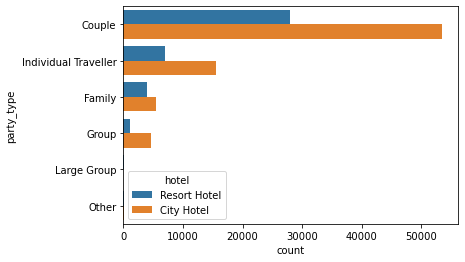

In [153]:
sns.countplot(data = hotel_bookings, y = 'party_type', hue = 'hotel')

<AxesSubplot:xlabel='count', ylabel='party_type'>

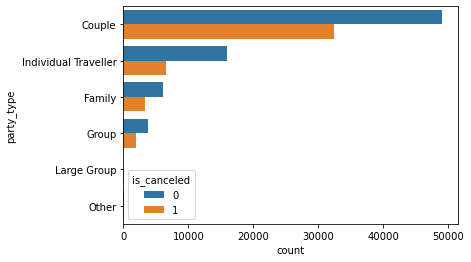

In [154]:
sns.countplot(data = hotel_bookings, y = 'party_type', hue = 'is_canceled')

#### Cancelations

In [ ]:
# Do some analysis on repeated_guest, previous_cancelations, deposit type etc etc

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

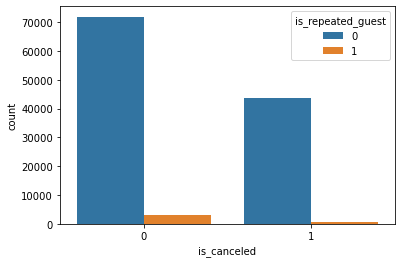

In [173]:
sns.countplot(data = hotel_bookings, x = 'is_canceled', hue = 'is_repeated_guest')

#### Group by / sort / index etc

In [160]:
# Group by - how far in advance various party types book
hotel_bookings.groupby("party_type", sort=True)["lead_time"].mean().sort_values(ascending = False)

party_type
Large Group             282.062500
Couple                  116.844899
Group                    94.608939
Family                   88.557319
Individual Traveller     66.815509
Unknown                  39.233333
Name: lead_time, dtype: float64

In [157]:
# Group by - total nights stayed per party type
hotel_bookings.groupby("party_type")["total_nights"].mean().sort_values(ascending = False)

party_type
Large Group             5.687500
Unknown                 4.522222
Family                  3.933512
Group                   3.710021
Couple                  3.555260
Individual Traveller    2.677207
Name: total_nights, dtype: float64

In [71]:
#### Want to look at week numbers - e.g. christmas / midterm etc YoY

In [ ]:
#### Cluster customers based on city/resort, kids/babies etc

In [202]:
#### Want to join to is_holiday API data

In [4]:
#### Drop columns because there are too many - done

In [82]:
#### Look at most common country / excluding Portugal